# 実践：パーマー諸島のペンギンデータの可視化

## 目標

このデータ分析レポートの目的は、パーマー諸島に生息するペンギンのサンプルに関連する変数を可視化し、種類、性別、生息する島などの要因と、体重、くちばしの長さと深さ、ひれの長さといったペンギンの身体的特徴との関係を探求・分析することです。

## 紹介

生データ`Penguins.csv`はパーマー諸島にある3つの島から収集された334のペンギン標本、およびペンギンに関連する属性データ（種名、所在島、くちばしの長さ、くちばしの深さ、ひれの長さ、体重、性別）を含む。

`Penguins.csv`カラムの定義：
- species：ペンギンの種類
- island：ペンギンの所在島
- culmen_length_mm：ペンギンくちばしの長さ（単位はmm）
- culmen_depth_mm：ペンギンくちばしの深さ（単位はmm）
- flipper_length_mm：ペンギンヒレの長さ（単位はmm）
- body_mass_g：ペンギン体重（単位はg）
- sex：ペンギン性別

## データの読み込み

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**データ解析に必要なライブラリをインポートし、Pandasのread_csv関数を通して、元データファイルPenguins.csvのデータ内容をDataFrameにパースし、変数c_data(cleaned_dataの意味)に代入する。**

In [25]:
raw_data = pd.read_csv("./penguins.csv")
c_data = raw_data.copy()
c_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## データの評価とクリーンアップ

#### データのクリーン度

In [29]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**出力結果から、データには合計344の観察対象があり、culmen_length_mm、culmen_depth_mm、flipper_length_mm、body_mass_g変数に欠損値があるが、これは後で評価し、クリーンアップする。**

**データ型に関しては、SPECIES（ペンギンの種）、SEX（ペンギンの性別）、ISLAND（ペンギンがいる島）は、すべてカテゴリーデータであることがわかる。これらのデータ型をカテゴリーに変換する。**

In [33]:
c_data["sex"] = c_data["sex"].astype("category")
c_data["island"] = c_data["island"].astype("category")
c_data["species"] = c_data["species"].astype("category")
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


#### 欠損値の処理

**info関数の出力から、c_dataの変数culmen_length_mm、culmen_depth_mm、flipper_length_mm、body_mass_g、sexに欠損値がある。**

**これらの変数が欠落しているデータは、まず見るために抽出する。**

In [37]:
c_data.query("culmen_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [47]:
c_data.query("culmen_depth_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [39]:
c_data.query("flipper_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [43]:
c_data.query("body_mass_g.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


**以上から、インデックス3と339のデータは、種と所属島を除くすべての変数で空であり、ペンギンの身体的属性に関連する因子を探索するための値を提供しないため、削除しても良い。**

In [50]:
c_data.drop(3, inplace=True)
c_data.drop(339, inplace=True)

In [52]:
c_data.query("sex.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


**性別変数が欠損しているデータには、分析にまだ価値を提供できる他のデータがある。**
**Pandasは、MatplotlibやSeabornと同様に、欠損値を自動的に無視するため残しても良い**

#### 不整合データの処理

**すべてのカテゴリー変数には一貫性のないデータが存在する可能性があり、異なる値が実際には同じ対象を指しているケースがあるかどうかを確認する。**

In [62]:
c_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [64]:
c_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [66]:
c_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

**上記の出力から、SPECIES列とISLAND列には不整合なデータはないが、SEX列には有効な性別を表さない「.」があるため、その値をNaNに置き換える必要がある。**

In [74]:
c_data['sex'] = c_data['sex'].replace(".", np.nan)

In [76]:
c_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

**変換成功**

#### 異常値の処理

In [80]:
c_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**異常値なさそう**

## データ探索

In [85]:
#チャートのカラーパレットを「パステル」に設定する
sns.set_palette("pastel")

In [87]:
c_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#### 種類の割合

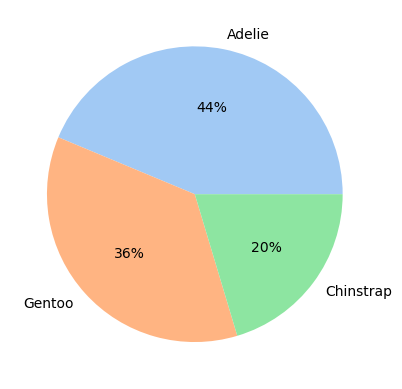

In [86]:
species_count = c_data["species"].value_counts()
plt.pie(species_count,autopct="%.0f%%",labels=species_count.index)
plt.show()

**サンプル内のペンギンのうち、Adelie種の割合が最も大きく、Gentoo種の割合が2番目に大きく、Chinstrap種の割合が約1/5で最も小さい**

#### 所属島の割合

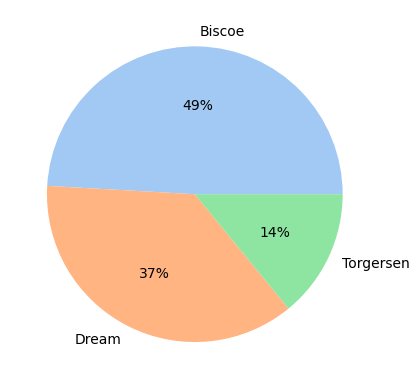

In [90]:
island_count = c_data["island"].value_counts()
plt.pie(island_count,autopct="%.0f%%",labels=island_count.index)
plt.show()

**ペンギンの約半数はBiscoe島からのもので、次いでDream島、Torgaersen島からのサンプルは最も少ない。**

#### 性別の割合

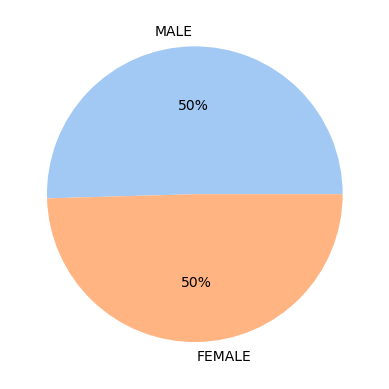

In [95]:
sex_count = c_data["sex"].value_counts()
plt.pie(sex_count,autopct="%.0f%%",labels=sex_count.index)
plt.show()

**サンプルペンギンの雌雄比は半々であり、無作為抽出の条件と一致している。**

#### それぞれの島に生息するペンギン種の数

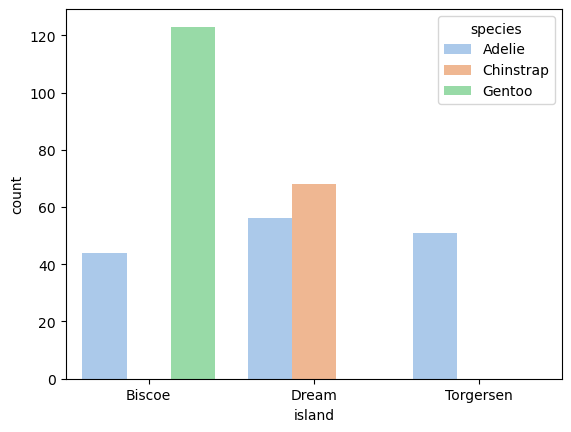

In [101]:
sns.countplot(c_data,x="island",hue="species")
plt.show()

**以上から、Adelie種のペンギンの標本はbiscoe、Dream、Torgersenの3つの島すべてで存在するのに対し、Chinstrap種はDream島でしか生息しない。Gentoo種はBiscoe島でしか見つかっていないことがわかる。**

#### それぞれの島に生息する雌雄ペンギンの数

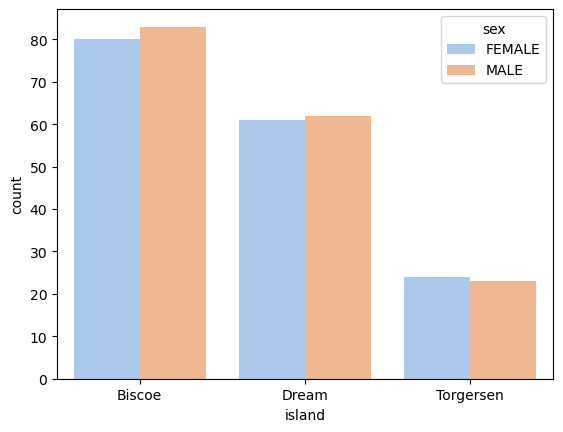

In [106]:
sns.countplot(c_data,x="island",hue="sex")
plt.show()

#### 因子間の相関関係

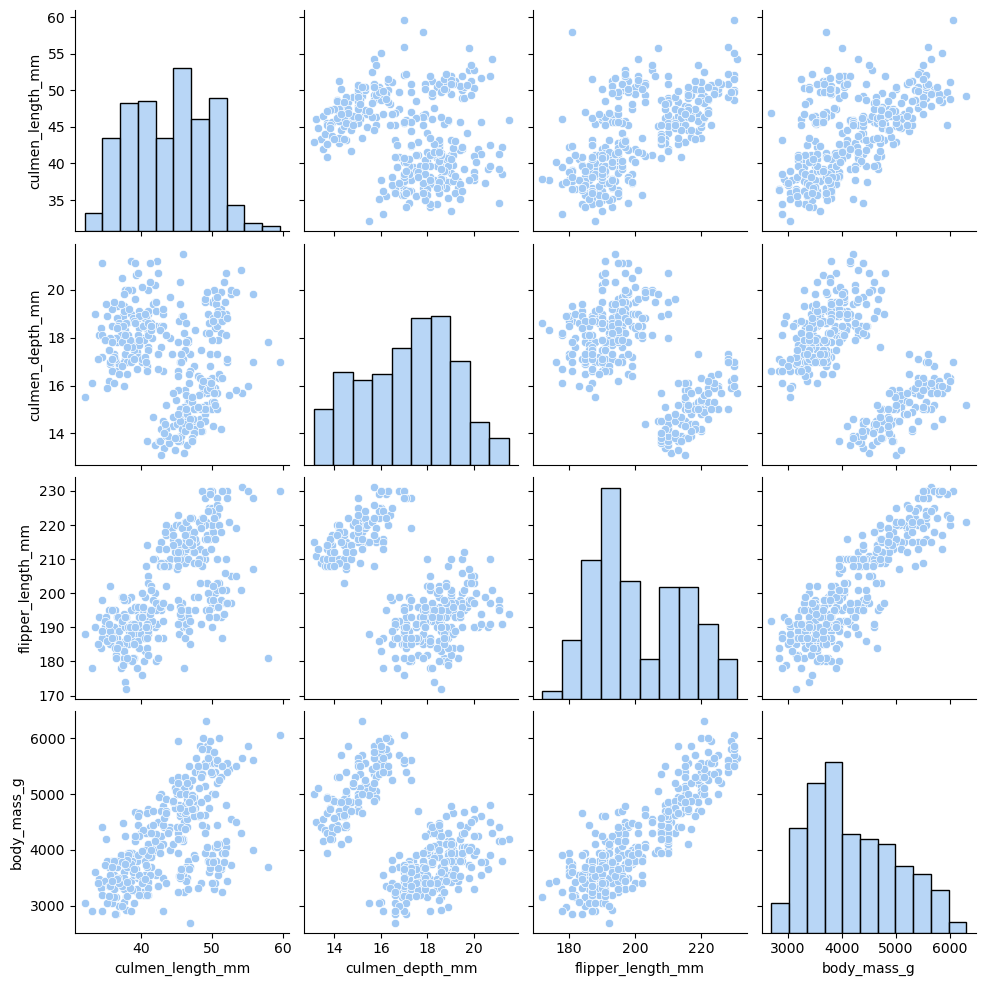

In [110]:
sns.pairplot(c_data)
plt.show()

**ヒストグラムから、ペンギンのサンプルのくちばしの長さ、くちばしの深さ、ヒレの長さ、体重の分布が正規分布していないことがわかる。 差のあるサンプルデータが複数セット含まれている可能性がある一方、サンプルサイズが十分大きくないことを示唆している。**

**その他、散布図から明らかに複数のクラスターの存在がわかる、それらはペンギンの種類や性別など特定の要因に関連している可能性があるため、さらに比較して分類することができる。**

#### 種から見る因子間の相関関係

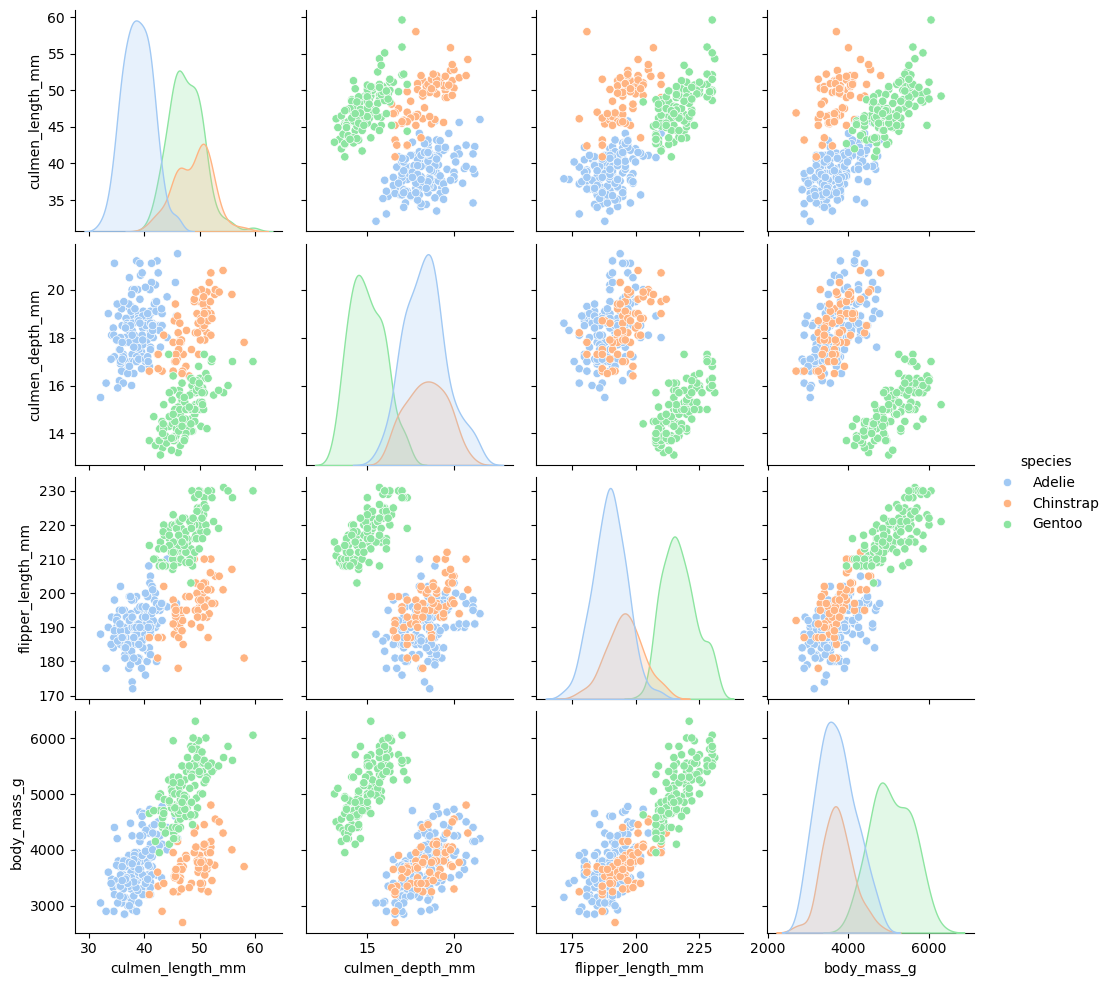

In [116]:
sns.pairplot(c_data,hue="species")
plt.show()

**散布図上では、同種のサンプルデータは基本的にまとまっており、同種のペンギンのクチバシの長さ、クチバシの深さ、ヒレの長さ、体重の関係には類似性があることがわかる。 これらの結果は、体重とヒレの長さからペンギンの種を推定したり、ペンギンの種から体重とヒレの長さを推定したりするのに有益**

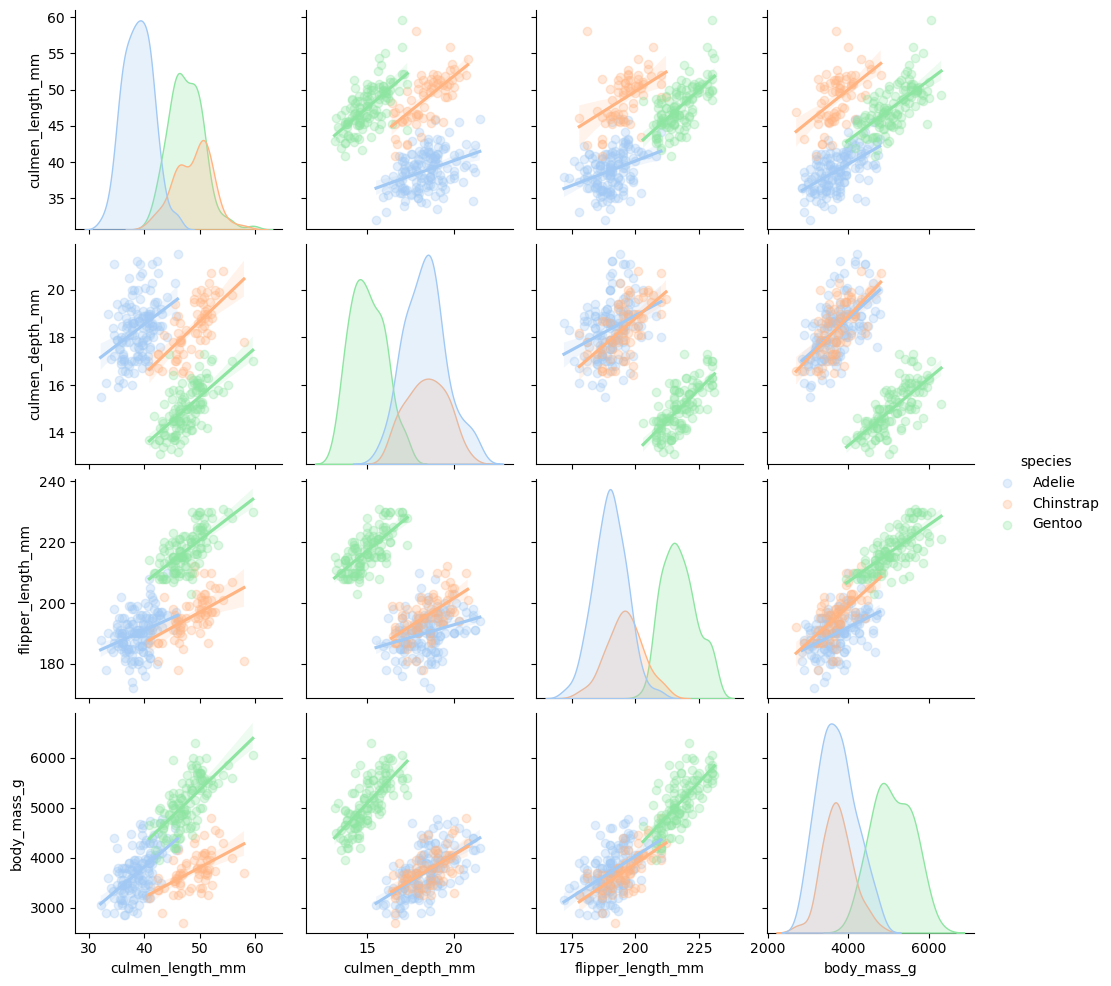

In [112]:
sns.pairplot(c_data,hue="species",kind="reg",plot_kws={"scatter_kws":{"alpha":0.3}})
plt.show()

**線形回帰直線と組み合わせた散布図は、類似ペンギンのすべての属性データが互いに正の相関していることを示している。つまり、「くちばしが長いほどくちばしが深い」「ヒレが長いほど体重が重い」「くちばしが短いほどくちばしが浅い」「ヒレが短いほど体重が軽い」ということがわかる**

#### 性別から見る因子間の相関関係

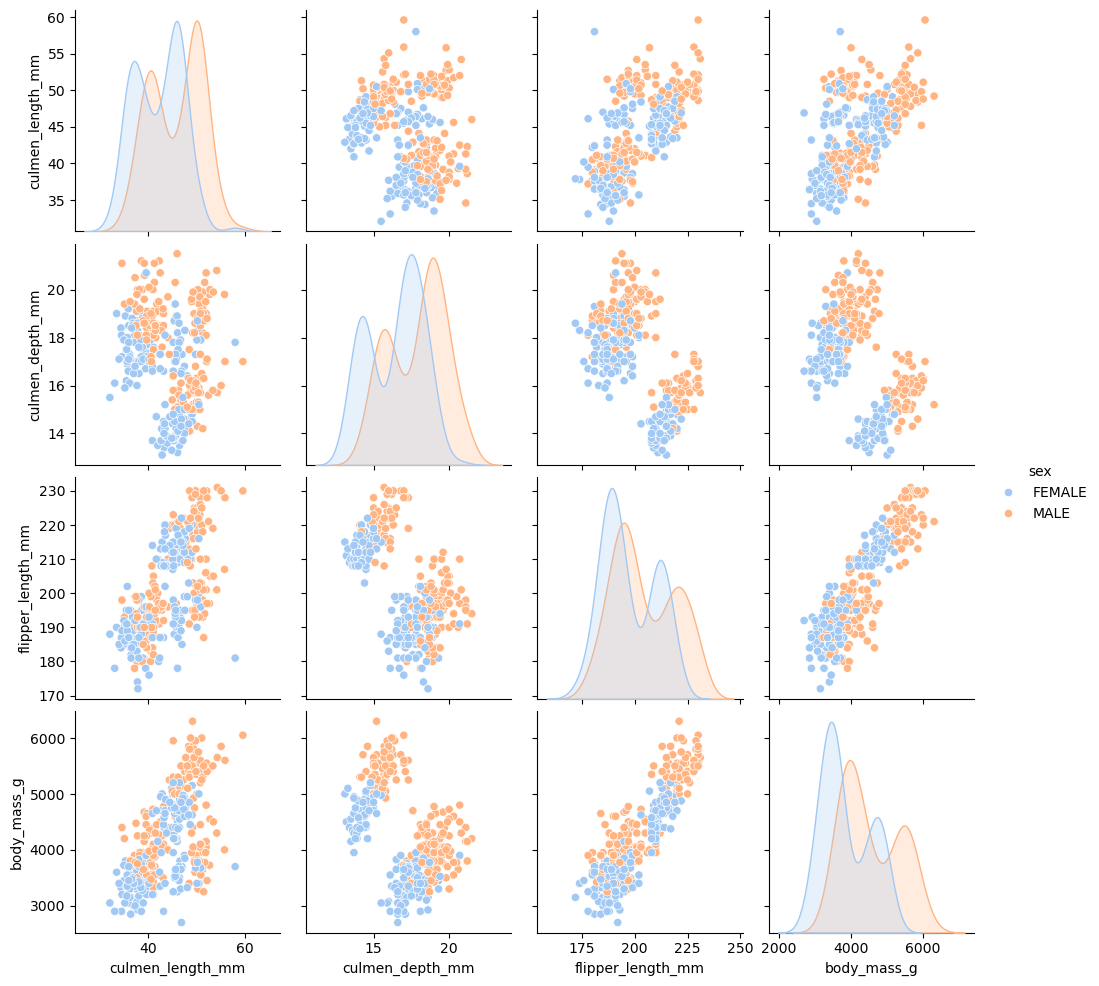

In [121]:
sns.pairplot(c_data,hue="sex")
plt.show()

**サンプルを性別によって分けた結果、サンプルのオスペンギンはメスペンギンよりも各属性の値において大きいことがわかる。**